# How to calculate Sharpness from .wav file (time-varying signal)

MoSQITo is a unified and modular development framework of key sound quality metrics favoring reproducible science and efficient shared scripting among engineers, teachers and researchers community.

This tutorial explains how to calculate the acoustic sharpness of a time-varying signal from its loudness and specific loudness values (Zwicker method) as described in DIN 45692_2009E.

In [1]:
# Add MoSQITo to the Python path
import sys
sys.path.append('..')

# Import useful packages
import numpy as np
import matplotlib.pyplot as plt
import IPython

# Import MoSQITo module
from mosqito.functions.shared.load import load
from mosqito.functions.sharpness.comp_sharpness import comp_sharpness

For this tutorial, the test signal n°24 from ISO 532-1 annex B5 is used. It is the recording of a woodpecker that can be heard by using the command below. According to the standard, for the calibration of the WAVE file, 0 dB (relative to full scale) shall correspond to a sound pressure level of 100 dB.  

In [2]:
IPython.display.Audio("../mosqito/validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 16 (hairdryer).wav")

The signal is loaded with the 'load' function, with the parameter is_stationary = False to indicate it is a time-varying signal.

In [3]:
# Load signal 
sig, fs = load(False,"../mosqito/validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 16 (hairdryer).wav", calib = 2 * 2**0.5 )

Then the sharpness is calculated with the 'comp_sharpness' function which automatically does the loudness calculation needed. The method chosen to do the calculation is given as a parameter (the parameter 'all' launches all the different calculation methods).
 
It is necessary to cut the transient effect at the beginning of the analysis for the number of seconds specified (parameter' skip'). This effect is due to the digital filters which can modify the result.

In [11]:
# Sharpness calculation
sharpness = comp_sharpness(False, sig, fs, method='din', skip=0.2)

The calculation being done, the results can be plotted or used for further analysis.

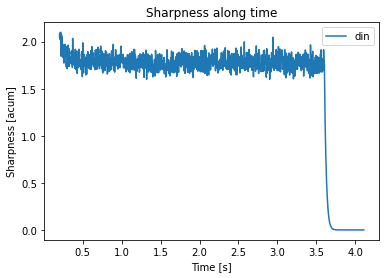

In [12]:
# Results plotting
S = sharpness['values']
method = sharpness['method']
time = np.linspace(sharpness['skip'], len(sig)/fs, len(S))
plt.title('Sharpness along time')
plt.plot(time, S, label=method)
plt.xlabel('Time [s]')
plt.ylabel('Sharpness [acum]')
plt.legend()
plt.show()


Mosqito offers several other calculation methods for the sharpness, which can be computed by changing the method parameter.

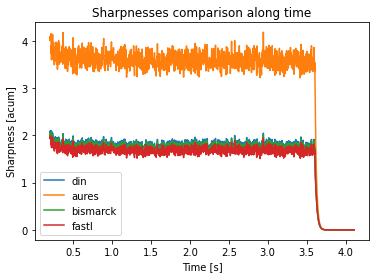

In [14]:
# Sharpness calculation
sharpness_a = comp_sharpness(False, sig, fs, method='aures', skip=0.2)
sharpness_b = comp_sharpness(False, sig, fs, method='bismarck', skip=0.2)
sharpness_f = comp_sharpness(False, sig, fs, method='fastl', skip=0.2)

# Comparison plot
plt.title('Sharpnesses comparison along time')
plt.plot(time, S, label=method)
plt.plot(time, sharpness_a['values'], label=sharpness_a['method'])
plt.plot(time, sharpness_b['values'], label=sharpness_b['method'])
plt.plot(time, sharpness_f['values'], label=sharpness_f['method'])
plt.xlabel('Time [s]')
plt.ylabel('Sharpness [acum]')
plt.legend()
plt.show()

The values slightly differ due to the weighting functions differences, except for Aures calculation which differ more (the weighting function takes into account the global loudness value).